# Installs

In [ ]:
#Pip installs
!pip install joblib -q
!pip install shap -q
!pip install umap -q
!pip install imblearn -q
!pip install umap-learn -q
!pip install mlflow -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 81.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.3/212.3 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.5/147.5 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Basic stuff
import numpy as np
import pandas as pd
# importing libraries for data visualisations
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
import warnings
import plotly.express as px
import plotly.graph_objects as go
import scipy
from scipy.stats import chi2_contingency 
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
from statistics import stdev
from pprint import pprint
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff
init_notebook_mode(connected=True)
sns.set_context("notebook")
import altair as alt
# Feature engineering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
#Parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix , accuracy_score ,classification_report
#Models to select from
from sklearn.ensemble import RandomForestClassifier  # <-- Change to RandomForestClassifier
#Evaluation and saving models
import joblib
import shap
from yellowbrick.features import FeatureImportances
import mlflow
import mlflow.sklearn
# Database management
import urllib.request
import sqlite3

#Data Management and cleaning


In [ ]:
#Pulling data
url = 'https://github.com/CNielsen94/Exercises_AAUBSDS/blob/main/MLOps_assignments/Assignment_three/Database/HR_DB.db?raw=true' 
filename = 'HR_DB.db' 
urllib.request.urlretrieve(url, filename)

('HR_DB.db', <http.client.HTTPMessage at 0x7f689820c370>)

In [ ]:
conn = sqlite3.connect('/content/HR_DB.db')

In [ ]:
query = 'SELECT * FROM EmployeeTiers'
employee_tiers = pd.read_sql(query, conn)

In [ ]:
query = 'SELECT * FROM manager_survey'
manager_survey = pd.read_sql(query, conn)

In [ ]:
query = 'SELECT * FROM employee_survey'
employee_survey = pd.read_sql(query, conn)

In [ ]:
query = 'SELECT * FROM general'
df_general = pd.read_sql(query, conn)

In [ ]:
conn.close()

We have decided to impute the mean value of the columns into the missing values of the employee_survey dataframe, as it is a relatively few amount of values that have gone missing, although these collectively could add up to about 70-ish rows gone with a df.drop() if all the values missing are in unique rows. This still wouldn't be catastrophic, but in this case better impute rather than lose all the information in those rows.



In [ ]:
# Merging dataframe manager_survey to df_general based on 'EmployeeID'
df_general = df_general.merge(manager_survey[['EmployeeID', 'JobInvolvement', 'PerformanceRating','total_mn']], on='EmployeeID')
df_EDA = df_general.merge(manager_survey[['EmployeeID', 'JobInvolvement', 'PerformanceRating','total_mn']], on='EmployeeID')
# Merging dataframe employee_survey to df_general based on 'EmployeeID'
df_general = df_general.merge(employee_survey[['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction','WorkLifeBalance','total_em']], on='EmployeeID')
df_EDA = df_general.merge(manager_survey[['EmployeeID', 'JobInvolvement', 'PerformanceRating','total_mn']], on='EmployeeID')
# Dropping rows containing NaN-values
df_EDA.dropna(axis=0,inplace=True)
df_general.dropna(axis=0,inplace=True)
df_general.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4382 entries, 0 to 4381
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4382 non-null   int64  
 1   Attrition                4382 non-null   object 
 2   BusinessTravel           4382 non-null   object 
 3   Department               4382 non-null   object 
 4   DistanceFromHome         4382 non-null   int64  
 5   Education                4382 non-null   int64  
 6   EducationField           4382 non-null   object 
 7   EmployeeCount            4382 non-null   int64  
 8   EmployeeID               4382 non-null   int64  
 9   Gender                   4382 non-null   object 
 10  JobLevel                 4382 non-null   int64  
 11  JobRole                  4382 non-null   object 
 12  MaritalStatus            4382 non-null   object 
 13  MonthlyIncome            4382 non-null   int64  
 14  NumCompaniesWorked      

We also drop some "useless" features from the dataset, as for example the "EmployeeCount" simply goes from 1-4410 along with the indexes, "Over18" only contains values for "Yes" as all employees are above 18. Finally the "StandardHours" only contain the value "8". Therefore these columns have no variance and don't tell us anything.

In [ ]:
df_general.drop(columns=['EmployeeCount','Over18','StandardHours','EmployeeID'], axis = 1, inplace = True)
df_general.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Class,JobInvolvement,PerformanceRating,total_mn,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,total_em
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,0,0,,3,3,3.0,3.0,4.0,2.0,3.000000
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,1,4,,2,4,3.0,3.0,2.0,4.0,3.000000
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,0,3,,3,3,3.0,2.0,2.0,1.0,1.666667
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,7,5,,2,3,2.5,4.0,4.0,3.0,3.666667
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,0,4,,3,3,3.0,4.0,1.0,3.0,2.666667


In [ ]:
df_general.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition_Class', 'JobInvolvement',
       'PerformanceRating', 'total_mn', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'WorkLifeBalance', 'total_em'],
      dtype='object')

In [ ]:
others = df_general.select_dtypes('object').columns
others

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Attrition_Class'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in others:
    df_general[col] = le.fit_transform(df_general[col])

#SML

In [ ]:
# Creating X and target value y
x_noSmote = df_general.drop(['Attrition', 'MonthlyIncome', 'DistanceFromHome', 'TotalWorkingYears', 'YearsAtCompany', 'Age', 'total_mn', 'total_em'], axis=1)
y_noSmote = df_general['Attrition']
print(x_noSmote.shape, y_noSmote.shape)

(4382, 20) (4382,)


In [ ]:
x_noSmote.columns

Index(['BusinessTravel', 'Department', 'Education', 'EducationField', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TrainingTimesLastYear',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_Class',
       'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'WorkLifeBalance'],
      dtype='object')

In [ ]:
smote = SMOTE(sampling_strategy='minority')
x ,y = smote.fit_resample(x_noSmote ,y_noSmote)
print(x.shape ,y.shape)

(7354, 20) (7354,)


Split the data into training and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=52)
print(X_train.shape)

(5883, 20)


Scale the data

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


X_train

array([[ 0.67449611, -0.32890478,  2.21448938, ..., -1.46248575,
        -1.50213188,  0.38262338],
       [ 0.67449611, -0.32890478,  1.20816766, ..., -0.55626605,
         1.2560673 ,  0.38262338],
       [ 0.67449611, -0.32890478,  0.20184593, ...,  0.00685066,
         1.12619788, -0.83843238],
       ...,
       [ 0.67449611, -0.32890478,  0.20184593, ...,  0.34995365,
        -0.58273215,  0.38262338],
       [ 0.67449611,  1.52983377,  0.20184593, ...,  0.34995365,
        -1.50213188,  0.38262338],
       [-0.90451727, -0.32890478,  0.20184593, ..., -0.0046635 ,
        -0.94250685,  0.38262338]])

Instantiate the model, fit it and give it a spin on the training data.

In [ ]:
rf_classifier = RandomForestClassifier()  # <-- Change to RandomForestClassifier

In [ ]:
# Fitting model
rf_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
print("RandomForest Classifier score on train data: ", rf_classifier.score(X_train, y_train))  # Model seems to be overfit to data

RandomForest Classifier score on train data:  1.0


In [ ]:
print("RandomForest Classifier score on test data: ", rf_classifier.score(X_test, y_test))  # Model seems to be overfit to data

RandomForest Classifier score on test data:  1.0


In [ ]:
# Predicting labels for the test set
y_pred = rf_classifier.predict(X_test)

In [ ]:
# Evaluating the model using confusion_matrix, accuracy_score, and classification_report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[760   0]
 [  0 711]]
Accuracy Score:  1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       760
           1       1.00      1.00      1.00       711

    accuracy                           1.00      1471
   macro avg       1.00      1.00      1.00      1471
weighted avg       1.00      1.00      1.00      1471



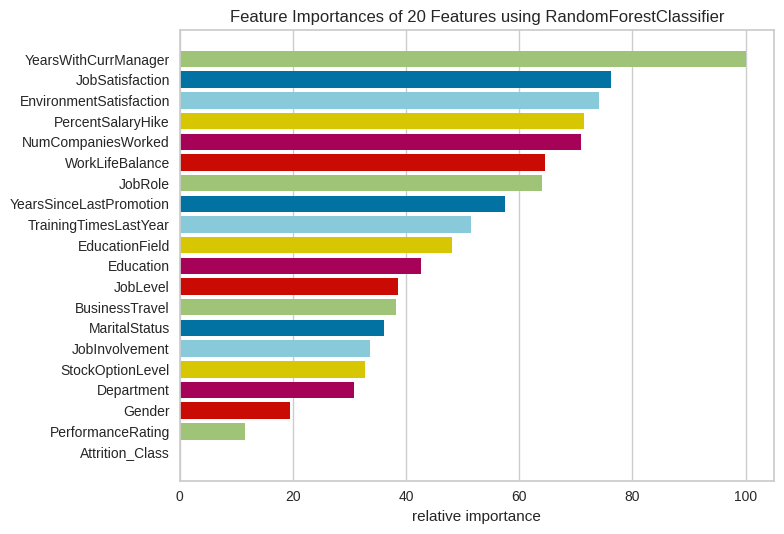

<Axes: title={'center': 'Feature Importances of 20 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [ ]:
# Visualizing feature importances
viz = FeatureImportances(rf_classifier)
viz.fit(x, y)
viz.show()

## Hyperparameter tuning

In [ ]:
# scorer = make_scorer(r2_score)
scorer = make_scorer(mean_squared_error)

In [ ]:
param_grid = {'bootstrap': [False],
 'max_depth': [10, 20, 30, None],
 'min_samples_split': [5, 10],
 'n_estimators': [30]}

In [ ]:
# Perform grid search on the classifier using 'scorer' as the scoring method.
grid_obj = GridSearchCV(rf_classifier, param_grid, scoring=scorer)

In [ ]:
grid_fit = grid_obj.fit(x, y)

After performing the grid search, we pull out the "best estimator", meaning the best model of the ones that were tested. We save this model in the variable "best_RF"

In [ ]:
# Get the estimator.
best_RF = grid_fit.best_estimator_

In [ ]:
# Fit the new model.
best_RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_split=10,
                       n_estimators=30)

In [ ]:
joblib.dump(best_RF, 'RF_model.json')

['RF_model.json']

In [ ]:
# Model performance on TRAIN data
print("RandomForest model score: ", best_RF.score(X_train,y_train))

RandomForest model score:  0.9862315145334013


In [ ]:
# Model performance on TEST data
print("RandomForest model score: ",best_RF.score(X_test,y_test))

RandomForest model score:  0.9857239972807614


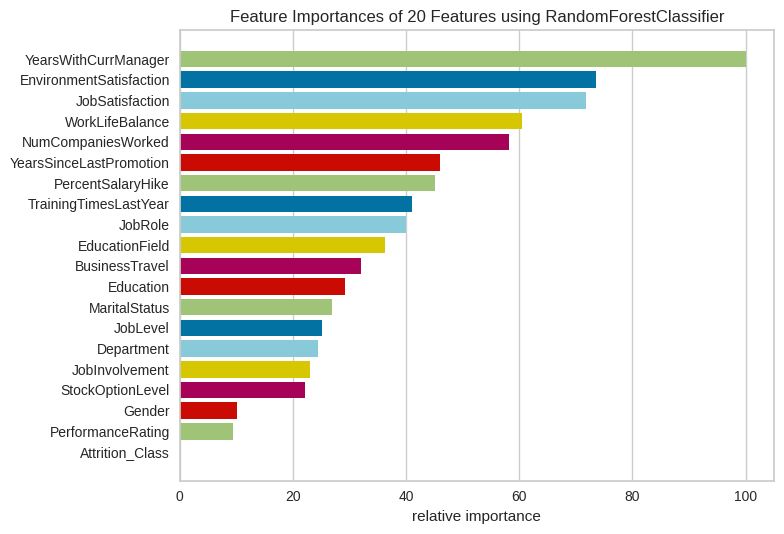

<Axes: title={'center': 'Feature Importances of 20 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [ ]:
viz = FeatureImportances(best_RF)
viz.fit(x, y)
viz.show()

##Prediction

In [ ]:
# Predicting labels for the test set using the best model
y_pred_best_RF = best_RF.predict(X_test)

# Counting the number of employees predicted to stay or leave
stay_count = np.count_nonzero(y_pred_best_RF == 0)
leave_count = np.count_nonzero(y_pred_best_RF == 1)

print(f"Number of employees predicted to stay: {stay_count}")
print(f"Number of employees predicted to leave: {leave_count}")

Number of employees predicted to stay: 747
Number of employees predicted to leave: 724


#MLflow Implementation

In [ ]:
import os
db_path = os.path.abspath("HR_DB.db")

In [ ]:
db_path

'/content/HR_DB.db'

2023/04/19 11:43:59 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2023/04/19 11:43:59 INFO mlflow.store.db.utils: Updating database tables
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
INFO  [alembic.runtime.migration] Running upgrade  -> 451aebb31d03, add metric step
INFO  [alembic.runtime.migration] Running upgrade 451aebb31d03 -> 90e64c465722, migrate user column to tags
INFO  [alembic.runtime.migration] Running upgrade 90e64c465722 -> 181f10493468, allow nulls for metric values
INFO  [alembic.runtime.migration] Running upgrade 181f10493468 -> df50e92ffc5e, Add Experiment Tags Table
INFO  [alembic.runtime.migration] Running upgrade df50e92ffc5e -> 7ac759974ad8, Update run tags with larger limit
INFO  [alembic.runtime.migration] Running upgrade 7ac759974ad8 -> 89d4b8295536, create latest metrics table
INFO  [89d4b8295536_create_latest_metrics_table_py] Migration complete!
INFO  

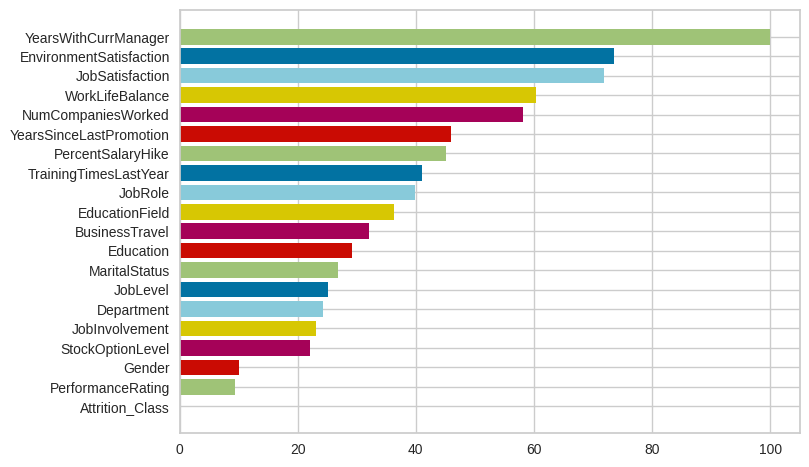

In [ ]:
# Setting the MLflow tracking server
mlflow.set_tracking_uri(f"sqlite:///{db_path}")  # Using SQLite to store the experiments
mlflow.set_experiment("Employee_Attrition_Prediction")

# Logging the experiment
with mlflow.start_run():
    # Logging hyperparameters
    mlflow.log_params(grid_fit.best_params_)

    # Logging metrics
    train_score = best_RF.score(X_train, y_train)
    test_score = best_RF.score(X_test, y_test)
    mlflow.log_metric("train_score", train_score)
    mlflow.log_metric("test_score", test_score)

    # Logging the model
    mlflow.sklearn.log_model(best_RF, "best_RF_model")

    # Logging artifacts (feature importances plot)
    viz = FeatureImportances(best_RF)
    viz.fit(x, y)

    viz_file = "feature_importances.png"
    plt.savefig(viz_file)

    mlflow.log_artifact(viz_file)